In [ ]:
import pandas as pd

# Load Dataset
file_path = "global_air_quality.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("📌 Dataset Preview:")
print(df.head())


📌 Dataset Preview:
  IndicatorCode                                          Indicator ValueType  \
0       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
1       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
2       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
3       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   
4       SDGPM25  Concentrations of fine particulate matter (PM2.5)      text   

  ParentLocationCode ParentLocation Location type SpatialDimValueCode  \
0                AFR         Africa       Country                 KEN   
1                AMR       Americas       Country                 TTO   
2                EUR         Europe       Country                 GBR   
3                AMR       Americas       Country                 GRD   
4                AMR       Americas       Country                 BRA   

                                            Location Period t

In [ ]:
# Keep only relevant columns
columns_to_keep = ["Location", "Period", "FactValueNumeric", "FactValueNumericLow", "FactValueNumericHigh", "Indicator"]
df = df[columns_to_keep]

# Display the updated dataset
print("📌 Dataset After Selecting Important Columns:")
print(df.head())


📌 Dataset After Selecting Important Columns:
                                            Location  Period  \
0                                              Kenya    2019   
1                                Trinidad and Tobago    2019   
2  United Kingdom of Great Britain and Northern I...    2019   
3                                            Grenada    2019   
4                                             Brazil    2019   

   FactValueNumeric  FactValueNumericLow  FactValueNumericHigh  \
0             10.01                 6.29                 13.74   
1             10.02                 7.44                 12.55   
2             10.06                 9.73                 10.39   
3             10.08                 7.07                 13.20   
4             10.09                 8.23                 12.46   

                                           Indicator  
0  Concentrations of fine particulate matter (PM2.5)  
1  Concentrations of fine particulate matter (PM2.5)  
2  Conce

In [ ]:
# Rename columns for better clarity
df.rename(columns={
    "FactValueNumeric": "Pollution_Value",
    "FactValueNumericLow": "Pollution_Low",
    "FactValueNumericHigh": "Pollution_High"
}, inplace=True)

# Display the updated dataset
print("📌 Dataset After Renaming Columns:")
print(df.head())


📌 Dataset After Renaming Columns:
                                            Location  Period  Pollution_Value  \
0                                              Kenya    2019            10.01   
1                                Trinidad and Tobago    2019            10.02   
2  United Kingdom of Great Britain and Northern I...    2019            10.06   
3                                            Grenada    2019            10.08   
4                                             Brazil    2019            10.09   

   Pollution_Low  Pollution_High  \
0           6.29           13.74   
1           7.44           12.55   
2           9.73           10.39   
3           7.07           13.20   
4           8.23           12.46   

                                           Indicator  
0  Concentrations of fine particulate matter (PM2.5)  
1  Concentrations of fine particulate matter (PM2.5)  
2  Concentrations of fine particulate matter (PM2.5)  
3  Concentrations of fine particulate matt

In [ ]:
# Check for missing values
print("📌 Missing Values Before Cleaning:")
print(df.isna().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Check missing values after cleaning
print("\n📌 Missing Values After Cleaning:")
print(df.isna().sum())


📌 Missing Values Before Cleaning:
Location           0
Period             0
Pollution_Value    0
Pollution_Low      0
Pollution_High     0
Indicator          0
dtype: int64

📌 Missing Values After Cleaning:
Location           0
Period             0
Pollution_Value    0
Pollution_Low      0
Pollution_High     0
Indicator          0
dtype: int64


In [ ]:
# Save cleaned dataset to a new CSV file
cleaned_file = "global_air_quality_cleaned.csv"
df.to_csv(cleaned_file, index=False)

print(f"✅ Cleaned dataset saved as {cleaned_file}")


✅ Cleaned dataset saved as global_air_quality_cleaned.csv


# Summary Statistics

In [ ]:
# Display dataset summary statistics
print("📌 Dataset Summary:")
print(df.describe())


📌 Dataset Summary:
            Period  Pollution_Value  Pollution_Low  Pollution_High
count  9450.000000      9450.000000    9450.000000     9450.000000
mean   2014.500000        23.538435      16.229705       35.475423
std       2.872433        15.024029      11.174679       27.150003
min    2010.000000         4.590000       1.410000        5.260000
25%    2012.000000        11.920000       7.850000       15.950000
50%    2014.500000        19.570000      13.790000       24.480000
75%    2017.000000        30.977500      20.340000       49.687500
max    2019.000000        97.490000      70.240000      175.600000


# Boxplot for Pollution Levels

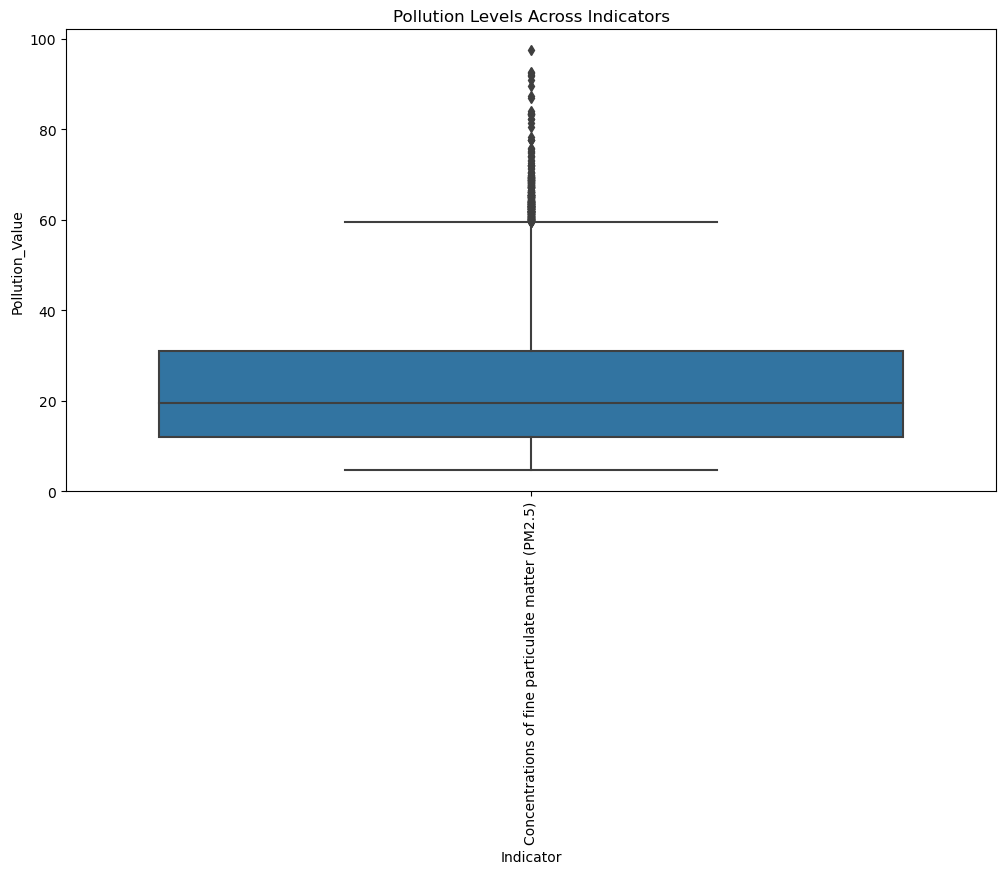

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pollution levels across different locations
plt.figure(figsize=(12, 6))
sns.boxplot(x="Indicator", y="Pollution_Value", data=df)
plt.xticks(rotation=90)
plt.title("Pollution Levels Across Indicators")
plt.show()


# Correlation Heatmap

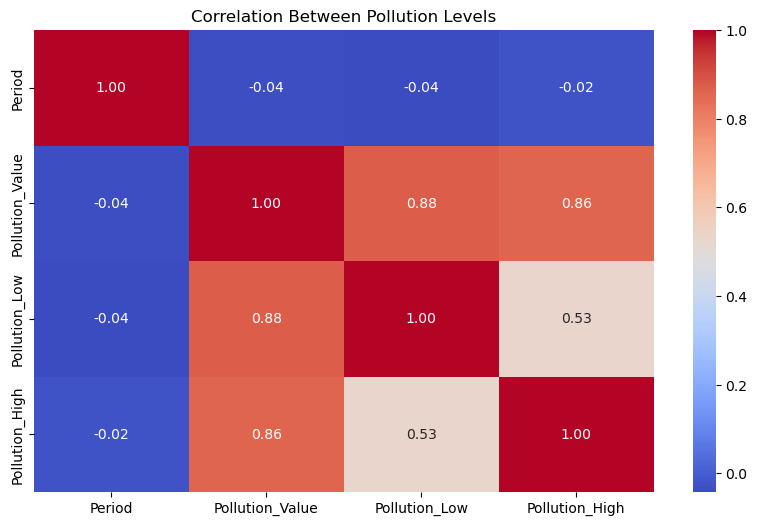

In [ ]:
# Compute correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pollution Levels")
plt.show()


# Pollution Trends by country

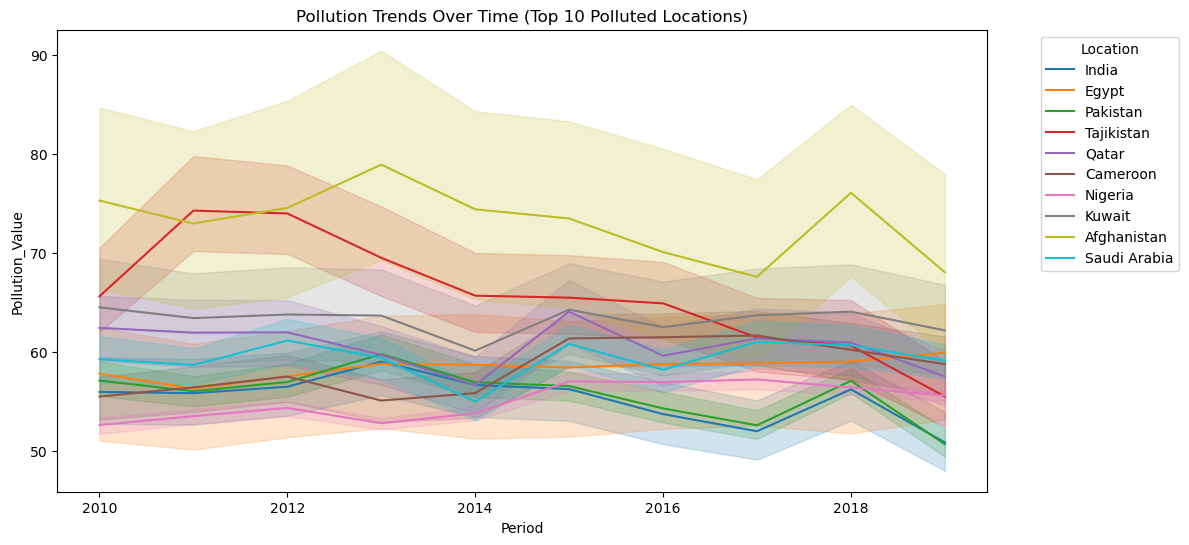

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most polluted locations
top_polluted = df.groupby("Location")["Pollution_Value"].mean().sort_values(ascending=False).head(10).index

# Filter the dataset to include only these locations
df_top = df[df["Location"].isin(top_polluted)]

# Create the line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_top, x="Period", y="Pollution_Value", hue="Location")
plt.title("Pollution Trends Over Time (Top 10 Polluted Locations)")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Deeper Analysis: Air Pollution Insights

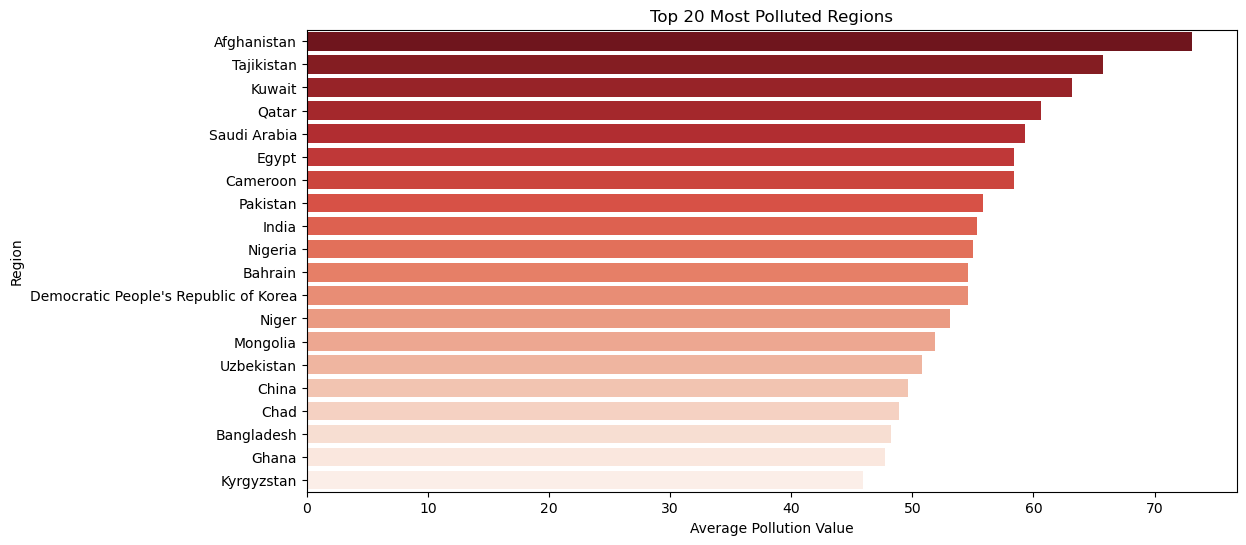

In [ ]:
# Group data by continent and calculate mean pollution
df_continent = df.groupby("Location")["Pollution_Value"].mean().reset_index()

# Sort by highest pollution levels and select the top 20
df_continent_top = df_continent.sort_values(by="Pollution_Value", ascending=False).head(20)

# Plot pollution by continent (Top 20)
plt.figure(figsize=(12,6))
sns.barplot(x="Pollution_Value", y="Location", data=df_continent_top, palette="Reds_r")
plt.title("Top 20 Most Polluted Regions")
plt.xlabel("Average Pollution Value")
plt.ylabel("Region")
plt.show()




# Find the Cleanest Locations (Lowest Pollution Levels)

In [ ]:
# Get the 10 least polluted countries
cleanest_countries = df.groupby("Location")["Pollution_Value"].mean().sort_values().head(10)

# Display cleanest locations
print("🌿 Cleanest Countries by Pollution Levels:\n")
print(cleanest_countries)


🌿 Cleanest Countries by Pollution Levels:

Location
Bahamas             5.30140
Finland             6.48760
Niue                6.55300
Iceland             6.57900
Sweden              6.70020
Tuvalu              6.84200
Nauru               6.92925
Canada              7.04360
Estonia             7.14420
Marshall Islands    7.28575
Name: Pollution_Value, dtype: float64


# Predict Future Pollution Trends Using Regression

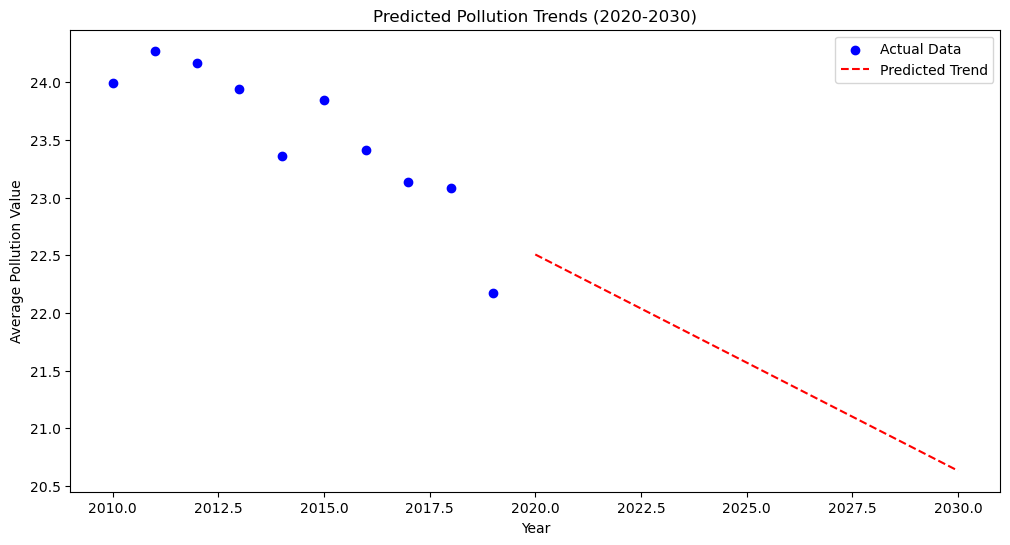

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
df_regression = df.groupby("Period")["Pollution_Value"].mean().reset_index()
X = df_regression["Period"].values.reshape(-1, 1)
y = df_regression["Pollution_Value"].values

# Train regression model
model = LinearRegression()
model.fit(X, y)

# Predict pollution for future years (2020-2030)
future_years = np.array(range(2020, 2031)).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot actual vs predicted pollution trends
plt.figure(figsize=(12,6))
plt.scatter(X, y, label="Actual Data", color="blue")
plt.plot(future_years, future_predictions, label="Predicted Trend", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Average Pollution Value")
plt.title("Predicted Pollution Trends (2020-2030)")
plt.legend()
plt.show()


# Compare Predicted Pollution Trends for Individual Countries

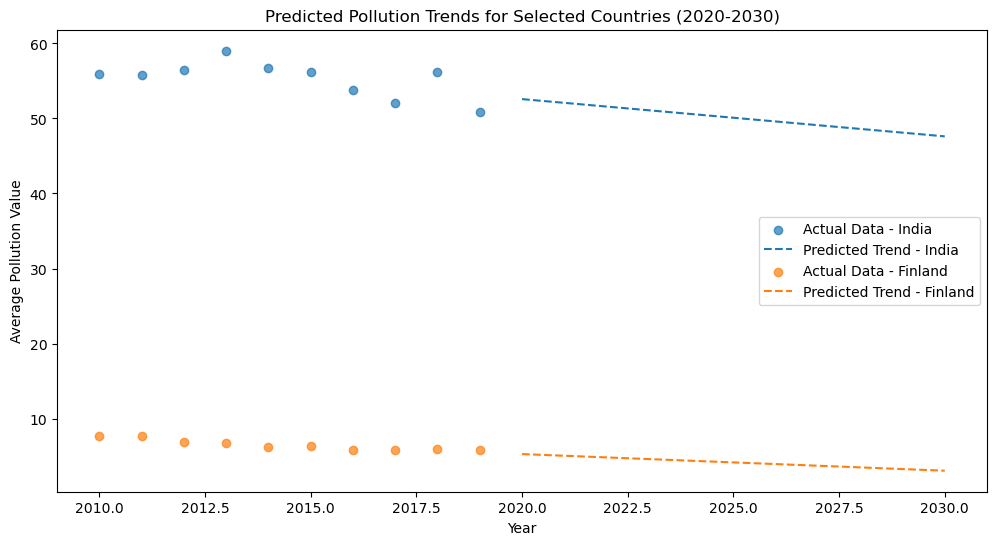

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Select countries for comparison
countries = ["India", "Finland"]

# Prepare the plot
plt.figure(figsize=(12,6))

for country in countries:
    # Filter data for the specific country
    df_country = df[df["Location"] == country]

    # Prepare data for regression
    df_regression = df_country.groupby("Period")["Pollution_Value"].mean().reset_index()
    X = df_regression["Period"].values.reshape(-1, 1)
    y = df_regression["Pollution_Value"].values

    # Train the regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict pollution for future years (2020-2030)
    future_years = np.array(range(2020, 2031)).reshape(-1, 1)
    future_predictions = model.predict(future_years)

    # Plot actual vs predicted pollution trends
    plt.scatter(X, y, label=f"Actual Data - {country}", alpha=0.7)
    plt.plot(future_years, future_predictions, linestyle="dashed", label=f"Predicted Trend - {country}")

# Final plot adjustments
plt.xlabel("Year")
plt.ylabel("Average Pollution Value")
plt.title("Predicted Pollution Trends for Selected Countries (2020-2030)")
plt.legend()
plt.show()


# ARIMA-Based Pollution Forecasting

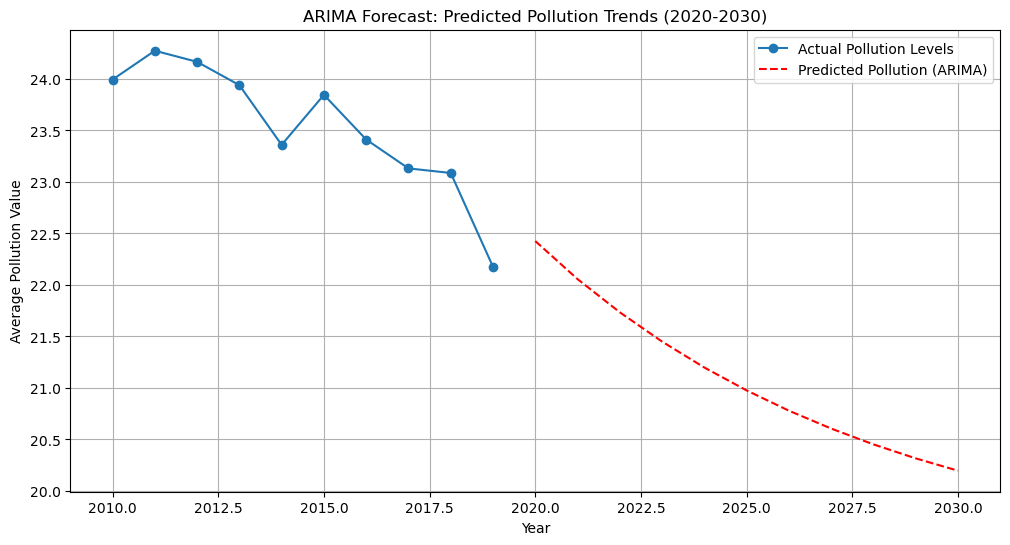

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Group data to get average pollution per year
df_timeseries = df.groupby("Period")["Pollution_Value"].mean().reset_index()
df_timeseries.set_index("Period", inplace=True)

# Fit ARIMA model
model = ARIMA(df_timeseries, order=(2,1,2))  # (p, d, q) parameters can be tuned
model_fit = model.fit()

# Predict future pollution levels for 2020-2030
forecast_years = list(range(2020, 2031))
forecast = model_fit.forecast(steps=len(forecast_years))

# Plot actual and forecasted pollution levels
plt.figure(figsize=(12,6))
plt.plot(df_timeseries, label="Actual Pollution Levels", marker="o")
plt.plot(forecast_years, forecast, label="Predicted Pollution (ARIMA)", linestyle="dashed", color="red")
plt.xlabel("Year")
plt.ylabel("Average Pollution Value")
plt.title("ARIMA Forecast: Predicted Pollution Trends (2020-2030)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install prophet

In [ ]:
import prophet
print("Prophet installed successfully!")

In [ ]:
import pandas as pd
df = pd.read_csv("global_air_quality_cleaned.csv")  # Ensure the dataset is available

# Predict Future Pollution Trends Using Prophet

22:57:27 - cmdstanpy - INFO - Chain [1] start processing
22:57:27 - cmdstanpy - INFO - Chain [1] done processing


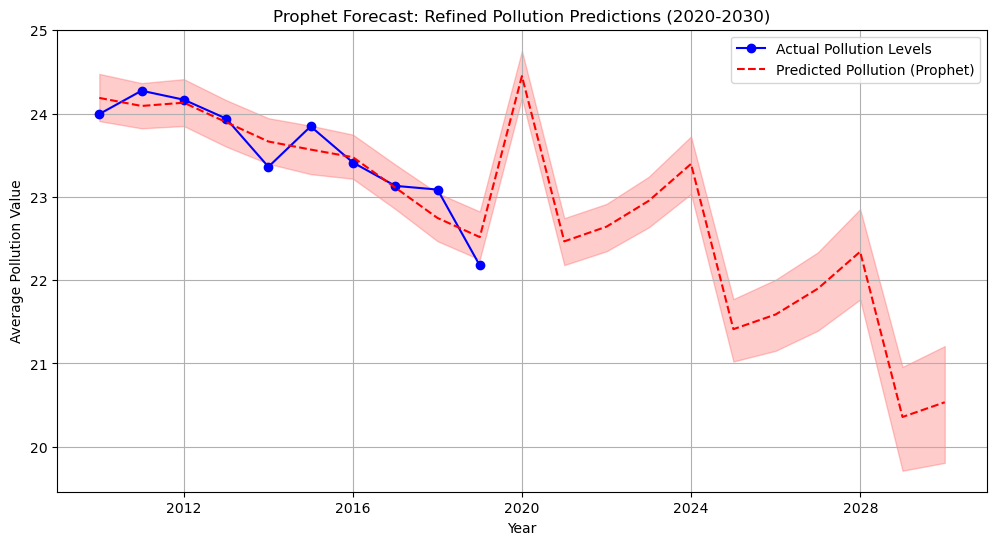

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Period is in datetime format
df_prophet = df.groupby("Period")["Pollution_Value"].mean().reset_index()
df_prophet["ds"] = pd.to_datetime(df_prophet["Period"], format="%Y")  # Convert year to datetime
df_prophet = df_prophet.rename(columns={"Pollution_Value": "y"})  # Prophet requires 'y' as target variable

# Initialize Prophet with yearly seasonality
model = Prophet(yearly_seasonality=True)  # ✅ Added yearly seasonality
model.fit(df_prophet[["ds", "y"]])

# Create future dates for prediction (2020-2030)
future = model.make_future_dataframe(periods=11, freq="Y")
forecast = model.predict(future)

# Plot actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual Pollution Levels", marker="o", color="blue")
plt.plot(forecast["ds"], forecast["yhat"], linestyle="dashed", color="red", label="Predicted Pollution (Prophet)")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="red", alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Average Pollution Value")
plt.title("Prophet Forecast: Refined Pollution Predictions (2020-2030)")
plt.legend()
plt.grid(True)
plt.show()


# Prophet vs. ARIMA

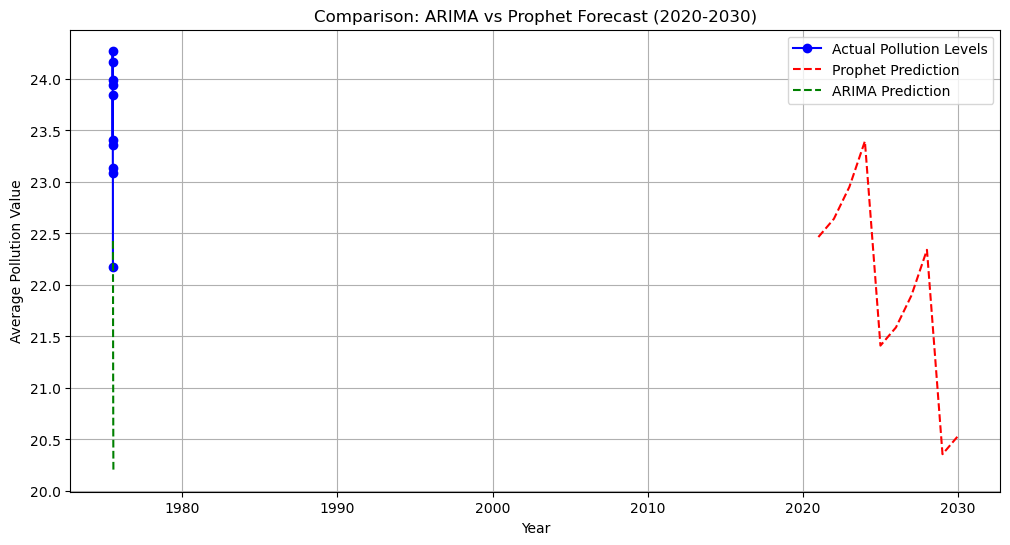

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Prepare time-series data for ARIMA
df_arima = df.groupby("Period")["Pollution_Value"].mean().reset_index()
df_arima.set_index("Period", inplace=True)

# Fit ARIMA model (auto-adjust parameters if needed)
model_arima = ARIMA(df_arima, order=(2,1,2))
model_arima_fit = model_arima.fit()

# Predict future pollution levels for 2020-2030
future_years = np.array(range(2020, 2031)).reshape(-1, 1)
arima_forecast = model_arima_fit.forecast(steps=len(future_years))

# Prophet Forecast (Reusing the trained Prophet model)
prophet_forecast = forecast[forecast["ds"].dt.year >= 2020]

# Compare Both Predictions in One Plot
plt.figure(figsize=(12,6))

# Plot actual data
plt.plot(df_arima.index, df_arima["Pollution_Value"], label="Actual Pollution Levels", marker="o", color="blue")

# Plot Prophet Predictions
plt.plot(prophet_forecast["ds"], prophet_forecast["yhat"], linestyle="dashed", color="red", label="Prophet Prediction")

# Plot ARIMA Predictions
plt.plot(future_years, arima_forecast, linestyle="dashed", color="green", label="ARIMA Prediction")

plt.xlabel("Year")
plt.ylabel("Average Pollution Value")
plt.title("Comparison: ARIMA vs Prophet Forecast (2020-2030)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)  # Lower changepoint sensitivity


In [ ]:
df_prophet["y"] = np.log(df_prophet["y"])


In [ ]:
print(forecast.head())  # ✅ Check if 'ds' column exists


In [ ]:
print(type(model))


In [ ]:
from prophet import Prophet

# Initialize Prophet
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
model.fit(df_prophet[["ds", "y"]])  # ✅ Ensure correct data format

# Generate future predictions
future = model.make_future_dataframe(periods=11, freq="Y")
forecast = model.predict(future)


22:57:42 - cmdstanpy - INFO - Chain [1] start processing
22:57:42 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# This should be a Prophet model
print(type(model))  # ✅ Confirm before running .predict()

forecast = model.predict(future)


In [ ]:
print(future.head())  # ✅ Verify if 'ds' exists in the future DataFrame


In [ ]:
future = model.make_future_dataframe(periods=11, freq="Y")


In [ ]:
future["ds"] = pd.to_datetime(future["ds"])  # ✅ Convert 'ds' explicitly


In [ ]:
forecast = model.predict(future)


In [ ]:
from prophet import Prophet
import pandas as pd

# Ensure dataset is correctly formatted
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])
df_prophet = df_prophet.rename(columns={"Pollution_Value": "y"})

# Initialize Prophet
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
model.fit(df_prophet[["ds", "y"]])

# Generate future predictions
future = model.make_future_dataframe(periods=11, freq="Y")

# Debugging: Check future DataFrame structure
print("Future DataFrame Preview:")
print(future.head())  # ✅ Ensure 'ds' exists and is in datetime format

# Explicitly convert 'ds' again
future["ds"] = pd.to_datetime(future["ds"])

# Run Prophet Prediction
forecast = model.predict(future)

# Debugging: Check forecast output
print("Forecast Preview:")
print(forecast.head())  # ✅ Ensure predictions are generated


22:57:48 - cmdstanpy - INFO - Chain [1] start processing
22:57:48 - cmdstanpy - INFO - Chain [1] done processing


Future DataFrame Preview:
          ds
0 2010-01-01
1 2011-01-01
2 2012-01-01
3 2013-01-01
4 2014-01-01
Forecast Preview:
          ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2010-01-01  7.720396   23.889464   24.493111     7.720396     7.720396   
1 2011-01-01  7.589619   23.809132   24.377586     7.589619     7.589619   
2 2012-01-01  7.458841   23.858204   24.412471     7.458841     7.458841   
3 2013-01-01  7.327700   23.622746   24.159862     7.327700     7.327700   
4 2014-01-01  7.196918   23.384968   23.934194     7.196918     7.196918   

   additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0       16.466967             16.466967             16.466967  16.466967   
1       16.501133             16.501133             16.501133  16.501133   
2       16.671039             16.671039             16.671039  16.671039   
3       16.568694             16.568694             16.568694  16.568694   
4       16.466967             16.466967  

In [ ]:
prophet_forecast = forecast[forecast["ds"].dt.year >= 2020]  # ✅ Filters only 2020-2030


In [ ]:
import numpy as np

# Apply log transformation to stabilize trends
df_prophet["y"] = np.log1p(df_prophet["y"])  # ✅ log1p prevents log(0) errors


In [ ]:
forecast["yhat"] = np.expm1(forecast["yhat"])  # ✅ Convert back to original scale


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize pollution values (scale between 0 and 1)
scaler = MinMaxScaler()
df_prophet["y"] = scaler.fit_transform(df_prophet[["y"]])

# Train Prophet again with normalized data
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
model.fit(df_prophet[["ds", "y"]])

# Make predictions
future = model.make_future_dataframe(periods=11, freq="Y")
forecast = model.predict(future)

# Reverse normalization (scale back to original values)
forecast["yhat"] = scaler.inverse_transform(forecast[["yhat"]])
forecast["yhat_lower"] = scaler.inverse_transform(forecast[["yhat_lower"]])
forecast["yhat_upper"] = scaler.inverse_transform(forecast[["yhat_upper"]])


22:57:55 - cmdstanpy - INFO - Chain [1] start processing
22:57:55 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.02)  # ✅ Reduce trend sensitivity


In [ ]:
model = Prophet(
    yearly_seasonality=True,
    changepoint_prior_scale=0.02,  # Adjust sensitivity
    changepoint_range=0.8  # Allow trend changes in 80% of historical data
)


In [ ]:
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"])  # Ensure correct datetime format


In [ ]:
df_prophet["y"] = df["Pollution_Value"]  # Ensure actual values are used


In [ ]:
model = Prophet(
    yearly_seasonality=True,
    changepoint_prior_scale=0.1,  # Increased sensitivity to trend changes
    changepoint_range=0.9  # Use 90% of historical data to detect trends
)


22:58:03 - cmdstanpy - INFO - Chain [1] start processing
22:58:16 - cmdstanpy - INFO - Chain [1] done processing


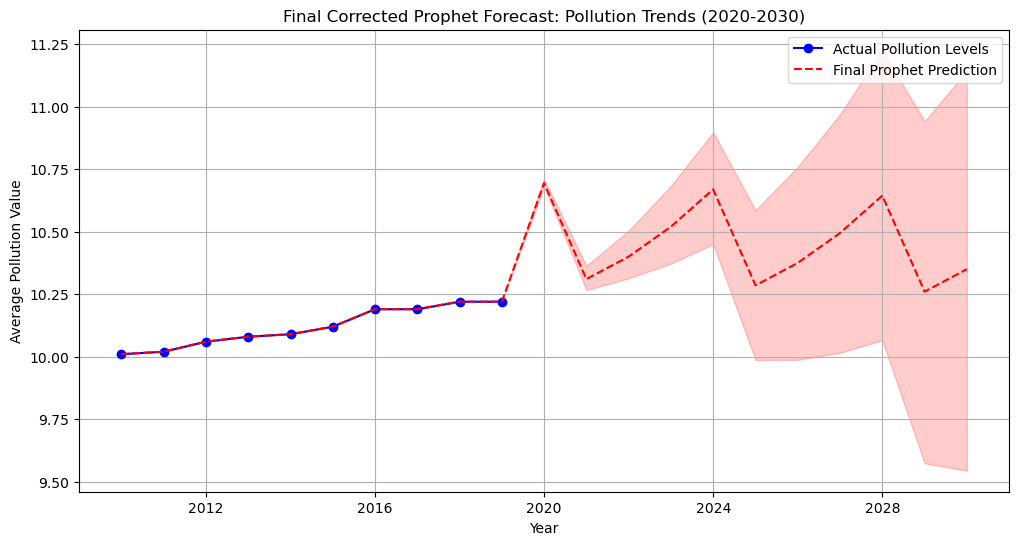

In [ ]:
# Retrain with Correct Setup
model.fit(df_prophet)

# Generate Future Dates
future = model.make_future_dataframe(periods=11, freq="Y")

# Make Predictions
forecast = model.predict(future)

# Plot Results
plt.figure(figsize=(12,6))
plt.plot(df_prophet["ds"], df_prophet["y"], label="Actual Pollution Levels", marker="o", color="blue")
plt.plot(forecast["ds"], forecast["yhat"], linestyle="dashed", color="red", label="Final Prophet Prediction")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="red", alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Average Pollution Value")
plt.title("Final Corrected Prophet Forecast: Pollution Trends (2020-2030)")
plt.legend()
plt.grid(True)
plt.show()
